### 다중분류
OvR / OvA (one vs Rest/ One vs All) 분류  

OvA  

[0,1,2,3,4] 5개 분류 => 2진분류기 5개  
0 -> 0 vs [1,2,3,4] -> 2진분류 -> 0일확률  
1 -> 1 vs [0,2,3,4] -> 2진분류 -> 1일확률  
2 -> 2 vs [1,0,3,4] -> 2진분류 -> 2일확률  
3 -> 3 vs [1,2,0,4] -> 2진분류 -> 3일확률  
4 -> 4 vs [1,2,3,0] -> 2진분류 -> 4일확률   
=> $ _nP_2 $ 번 분류

OvO (One vs One) 분류  

0 -> (0 vs 1) (0 vs 2) (0 vs 3) (0 vs 4)  
1 -> (1 vs 2) (1 vs 3) (1 vs 3)    
2 -> (2 vs 3) (2 vs 4)  
3 -> (3 vs 4)  
 => $ _nC_2 번 분류$

### 다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

In [49]:
### 모듈로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

# 판다스, 넘파이에 지수표기법 (과학적 표기법) 정지 설정
pd.options.display.float_format='{:.5f}'.format
np.set_printoptions(precision=5, suppress=True)



- 데이터셋 load_digits
    - 내장 데이터셋
    - 이미지 데이터셋 => 8*8 크기 이미지 ==> 1D로 64개피쳐
    - 이미지 라벨/타겟 => 숫자 0~9까지 즉, 총 10개 클래스
    - 흑백이미지

In [50]:
# 데이터 로딩
featureDF, targetSR =load_digits(as_frame=True,return_X_y=True)

# 이미지 픽셀 : 0~255 범위
featureDF=featureDF/255 

print(featureDF.shape,featureDF.ndim,targetSR.shape,targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [51]:
featureDF.head(1),targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0    0.00000    0.00000    0.01961    0.05098    0.03529    0.00392   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0    0.00000    0.00000    0.00000    0.00000  ...    0.00000    0.00000   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0    0.00000    0.00000    0.02353    0.05098    0.03922    0.00000   
 
    pixel_7_6  pixel_7_7  
 0    0.00000    0.00000  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

In [52]:
## 이미지 데이터 시각화
import matplotlib.pyplot as plt

imgDATA=featureDF.iloc[0].to_numpy().reshape(-1,8)
imgDATA.shape

(8, 8)

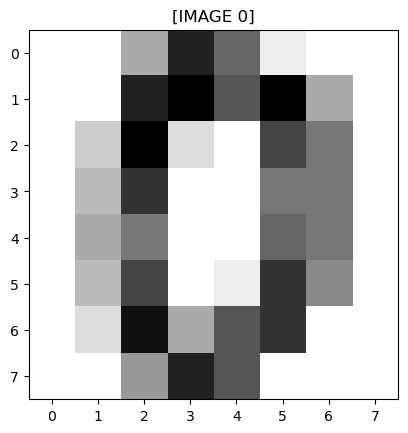

In [53]:
plt.imshow(imgDATA,cmap='binary')
plt.title(f'[IMAGE {targetSR[0]}]')
plt.show()

- 학습용 데이터셋 준비 : trainDS, testDS

In [54]:
X_train,X_test,y_train,y_test=train_test_split(featureDF,targetSR,
                                               stratify=targetSR,
                                               random_state=10)

- OvR(Over vs Rest) 또는 OvA(Over vs All)
    - 클래스마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [55]:
# 모듈로딩
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf=OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train,y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [56]:
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.xlasses_ : {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer__ : {ovr_clf.label_binarizer_}')
      

ovr_clf.estimators_ : 10개
ovr_clf.xlasses_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_ : 10
ovr_clf.label_binarizer__ : LabelBinarizer(sparse_output=True)


In [57]:

for idx in range(ovr_clf.n_classes_):
    print(F'[{idx}분류기]',ovr_clf.estimators_[idx].coef_,ovr_clf.estimators_[idx].intercept_)

[0분류기] [[ 0.      -0.11721 -0.36198  0.63799 -0.25952 -1.28004 -0.54955 -0.05154
  -0.00249 -0.45077  0.87553  0.67567  0.76106  1.42182 -0.37271 -0.04791
  -0.00088  0.48397  1.73526 -0.56666 -1.82795  2.02796  0.6807  -0.023
  -0.00023  1.17167  1.43124 -2.77339 -4.06945  0.62179  1.75117 -0.00104
   0.       1.44042  1.66074 -3.35467 -4.16838 -0.18203  1.70005  0.
  -0.00623  0.7534   2.70398 -2.23501 -2.41565  1.07409  0.9191  -0.01273
  -0.00192  0.02321  2.27842  0.39121  0.56934  1.80144 -0.65105 -0.07935
  -0.00034 -0.11269 -0.54517  0.61515  0.57433 -0.67434 -0.77261 -0.13441]] [-2.29468]
[1분류기] [[ 0.      -0.14307 -1.13222 -1.18068 -0.86601  0.16924 -0.19531 -0.0615
  -0.00363 -0.88195 -2.79276  0.17626  1.54147  0.32276 -0.31992 -0.05406
  -0.00115 -0.63731 -1.21465  3.46826  3.13347 -0.13582 -0.45273 -0.02665
  -0.00055 -0.06865  0.07015  2.40062  1.5889  -0.631   -0.8095  -0.00121
   0.      -0.55857 -0.2603   1.11372  1.28959 -1.55166 -1.11288  0.
  -0.0062  -0.57725 -0.7

In [73]:
ovr_clf.predict_proba((X_test[:2]))

array([[0.07877, 0.07785, 0.11759, 0.19225, 0.04654, 0.10645, 0.08302,
        0.06987, 0.09086, 0.13678],
       [0.11829, 0.06343, 0.07984, 0.15454, 0.06515, 0.10996, 0.05302,
        0.08138, 0.09232, 0.18207]])

확인 해보자 >_<

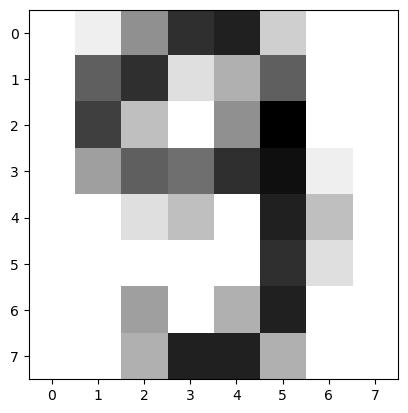

In [63]:
#문제 

import numpy as np
plt.imshow(np.array(X_test.iloc[1]).reshape(-1,8),cmap='binary')
plt.show()

In [84]:
# 모델적합도
ovr_clf.predict_proba(np.array(X_test.iloc[1]).reshape(-1,64))

c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anac

array([[0.11829, 0.06343, 0.07984, 0.15454, 0.06515, 0.10996, 0.05302,
        0.08138, 0.09232, 0.18207]])

In [67]:
# 예측값
ovr_clf.predict(np.array(X_test.iloc[1]).reshape(-1,64))

c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\KDP-30\anac

array([9])

In [71]:
# 실제정답
y_test.iloc[1]

9

In [75]:
ovr_clf.score(X_test,y_test)

0.88